In [40]:
import os
import shutil
import random

# Set the seed for reproducibility
random.seed(42)

root_dir = 'data_withoutanomalies'  # We have a folder that is the original dataset with anomalies removed manually
train_dir = 'train_data'  # Directory for training data
val_dir = 'val_data'  # Directory for validation data

# Create training and validation directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Get all label directories
labels = os.listdir(root_dir)

for label in labels:
    label_dir = os.path.join(root_dir, label)
    files = os.listdir(label_dir)

    # Shuffle files and calculate split
    random.shuffle(files)
    split_point = int(0.1 * len(files))

    # Files for validation
    val_files = files[:split_point]
    # Files for training
    train_files = files[split_point:]

    # Create corresponding label directories in train and val directories
    train_label_dir = os.path.join(train_dir, label)
    val_label_dir = os.path.join(val_dir, label)
    os.makedirs(train_label_dir, exist_ok=True)
    os.makedirs(val_label_dir, exist_ok=True)

    # Copy files
    for file in val_files:
        shutil.copy(os.path.join(label_dir, file), os.path.join(val_label_dir, file))
    for file in train_files:
        shutil.copy(os.path.join(label_dir, file), os.path.join(train_label_dir, file))

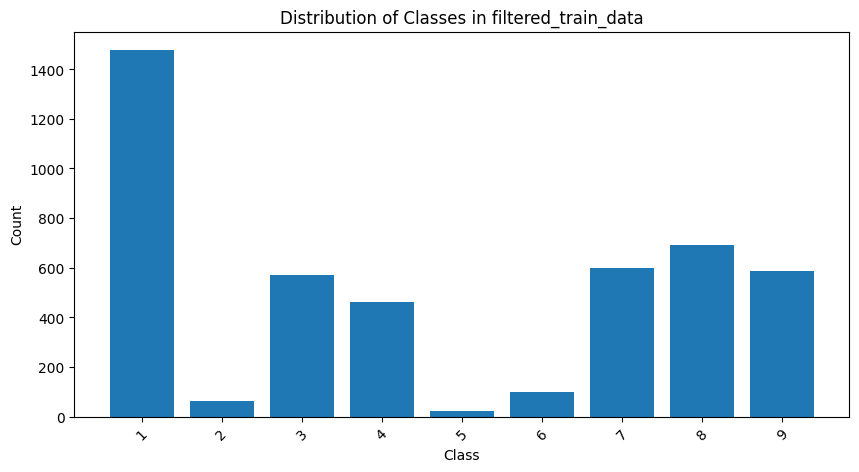

In [41]:
# counting the images in the filtered_train_data directory and plot the distribution of classes

import os
from collections import Counter
import matplotlib.pyplot as plt

data_dir = 'train_data'

class_counts = Counter()

# Iterate over all subdirectories in the data directory
for subdir in os.listdir(data_dir):
    subdir_path = os.path.join(data_dir, subdir)

    # Count the number of files in the subdirectory
    num_files = len(os.listdir(subdir_path))

    # Update the counter with the count
    class_counts[subdir] = num_files


plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes in filtered_train_data')
plt.xticks(rotation=45)
plt.show()


In [13]:
# plot all image resolutions in train_data in a single plot
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

dataset = ImageFolder('train_data', transform=ToTensor())

# Extract resolutions
resolutions = [(img.shape[2], img.shape[1]) for img, _ in dataset]  # (width, height)

# Separate widths and heights
widths, heights = zip(*resolutions)

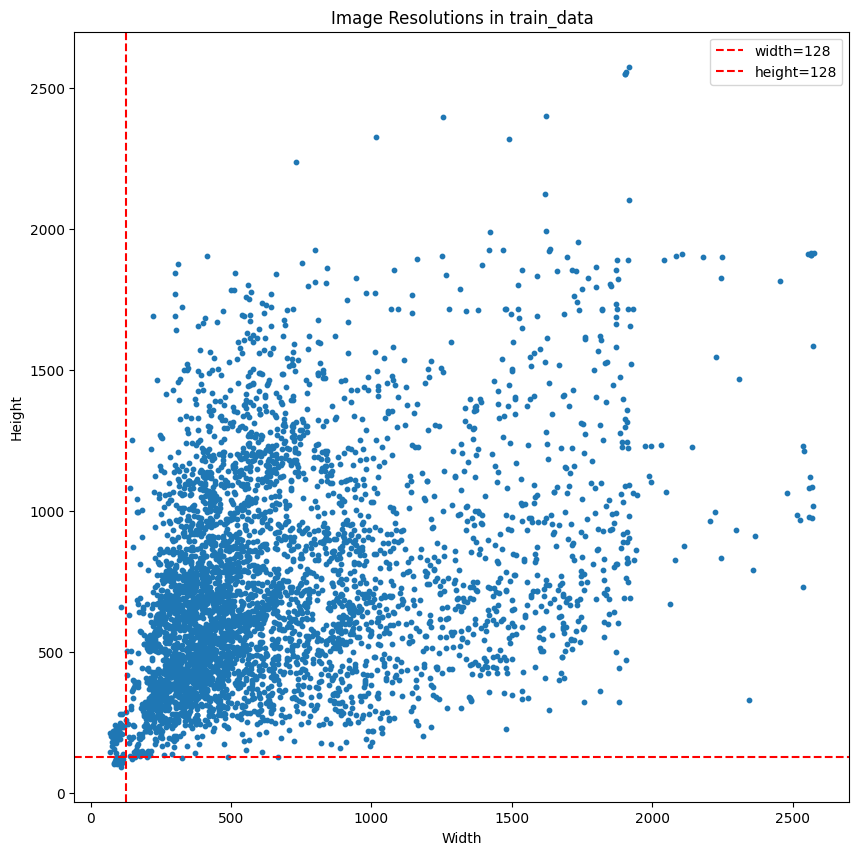

In [14]:
# Create a larger plot
plt.figure(figsize=(10, 10))

# Create the scatter plot with smaller dots
plt.scatter(widths, heights, s=10)

# Add lines at width=128 and height=128 with labels
plt.axvline(x=128, color='r', linestyle='--', label='width=128')
plt.axhline(y=128, color='r', linestyle='--', label='height=128')

plt.title('Image Resolutions in train_data')
plt.xlabel('Width')
plt.ylabel('Height')


plt.legend()

plt.show()

Code to delete images with height < 128 or width < 128

In [ ]:
# import os
# import shutil
# from PIL import Image

# # Define source and destination directories
# src_dir = 'train_data'
# dst_dir = 'filtered_train_data'

# not_copied_count = 0

# # Delete the destination directory if it exists
# if os.path.exists(dst_dir):
#     shutil.rmtree(dst_dir)

# # Iterate over all subdirectories in the source directory
# for subdir in os.listdir(src_dir):
#     src_subdir = os.path.join(src_dir, subdir)
#     dst_subdir = os.path.join(dst_dir, subdir)

#     # Create the destination subdirectory
#     os.makedirs(dst_subdir, exist_ok=True)

#     # Iterate over all files in the source subdirectory
#     for filename in os.listdir(src_subdir):
#         if filename.endswith('.jpg') or filename.endswith('.png'):  # Add any other image types if needed
#             src_file = os.path.join(src_subdir, filename)
#             dst_file = os.path.join(dst_subdir, filename)

#             # Open the image file
#             with Image.open(src_file) as img:
#                 # Check if the image width or height is >= 128
#                 if img.size[0] >= 128 and img.size[1] >= 128:
#                     # Copy the file to the destination directory
#                     shutil.copy(src_file, dst_file)
#                 else:
#                     not_copied_count += 1
#                     # Print the name of the image not copied
#                     print(f"Image not copied: {src_file}")

# # Print the total number of images not copied
# print(f"Total images not copied: {not_copied_count}")

In [15]:
import shutil
import os
from PIL import Image
from torchvision import transforms
import random

def clone_directory_structure(src, dst):
    if os.path.exists(dst):
        shutil.rmtree(dst)  # Remove the destination if it exists
    shutil.copytree(src, dst, copy_function=lambda src, dst: None)  # Copy only directories

source_dir = 'train_data'
destination_dir = 'train_data_augmented'
clone_directory_structure(source_dir, destination_dir)



# Define the augmentation transformations
transform_augment = transforms.Compose([
    transforms.Resize((175, 175)),  # Resize to a consistent larger size
    transforms.RandomRotation((-100,100), fill=(255,255,255)),  # Rotate up to 100 degrees and fill the corners with white
    transforms.CenterCrop((128, 128)),  # Crop to the desired size
    transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
])

def count_images(directory):
    """ Count the number of images in each subfolder of the directory. """
    counts = {}
    for folder in os.listdir(directory):
        path = os.path.join(directory, folder)
        counts[folder] = len(os.listdir(path))
    return counts

def augment_images(src_folder, dst_folder, num_augments):
    """ Augment images in src_folder and save them in dst_folder until num_augments is reached. """
    image_files = os.listdir(src_folder)
    augmented_count = 0
    
    while augmented_count < num_augments:
        for img_name in image_files:
            if augmented_count >= num_augments:
                break
            
            img_path = os.path.join(src_folder, img_name)
            img = Image.open(img_path).convert('RGB')
            
            # Determine the number of augmentations for this image
            num_augmentations = random.randint(1, 3)
            for _ in range(num_augmentations):
                img_augmented = transform_augment(img)
                augmented_img_name = f"aug_{random.randint(1, 10000)}_{img_name}"
                img_augmented.save(os.path.join(dst_folder, augmented_img_name))
                augmented_count += 1



image_counts = count_images(source_dir)
for class_id in os.listdir(source_dir):
    src_folder = os.path.join(source_dir, class_id)
    dst_folder = os.path.join(destination_dir, class_id)
    
    if not os.path.exists(dst_folder):
        os.makedirs(dst_folder)
    
    shutil.copytree(src_folder, dst_folder, dirs_exist_ok=True)  # Copy original images
    
    # Calculate 30% of the original image count to determine how many images to augment
    original_count = image_counts[class_id]
    num_to_augment = int(original_count * 0.3)
    
    augment_images(src_folder, dst_folder, num_to_augment)




In [16]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the transformation
transform_train = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),  # Convert images to PyTorch tensors
])

transform_val = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()  # Convert images to PyTorch tensors
])

# Define the root directories for train and validation datasets
train_dir = 'train_data_augmented'  # Path to training data
val_dir = 'val_data'  # Path to validation data



# Create datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform_train)
val_dataset = datasets.ImageFolder(root=val_dir, transform=transform_val)



# Create DataLoaders for the training and validation sets
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=64)

# Print the sizes of the training and validation sets
print('Training set size:', len(train_dataset))
print('Validation set size:', len(val_dataset))

Training set size: 5942
Validation set size: 504


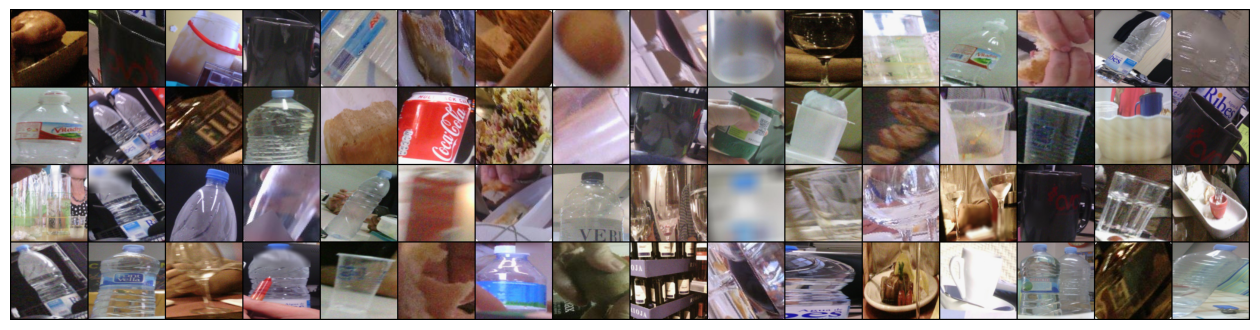

In [23]:
# visualize batch of images using torchvision
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of training data
inputs, classes = next(iter(train_dataloader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs, nrow=16,)

# Plot the grid
plt.figure(figsize=(16, 10))
plt.imshow(np.transpose(out, (1, 2, 0)))
plt.axis('off')
plt.show()

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DenseLayer(nn.Module):
    def __init__(self, input_features, growth_rate, bn_size=4, drop_rate=0):
        super(DenseLayer, self).__init__()
        self.bn1 = nn.BatchNorm2d(input_features)
        self.relu = nn.ReLU(inplace=True)
        self.conv1 = nn.Conv2d(input_features, bn_size * growth_rate, kernel_size=1, stride=1, bias=False)
        self.bn2 = nn.BatchNorm2d(bn_size * growth_rate)
        self.relu2 = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(bn_size * growth_rate, growth_rate, kernel_size=3, stride=1, padding=1, bias=False)
        self.drop_rate = drop_rate

    def forward(self, x):
        out = self.conv1(self.relu(self.bn1(x)))
        out = self.conv2(self.relu2(self.bn2(out)))
        if self.drop_rate > 0:
            out = F.dropout(out, p=self.drop_rate, training=self.training)
        return torch.cat([x, out], 1)

class DenseBlock(nn.Module):
    def __init__(self, num_layers, input_features, growth_rate, bn_size=4, drop_rate=0):
        super(DenseBlock, self).__init__()
        layers = []
        for i in range(num_layers):
            layers.append(DenseLayer(input_features + i * growth_rate, growth_rate, bn_size, drop_rate))
        self.block = nn.Sequential(*layers)

    def forward(self, x):
        return self.block(x)
    
class TransitionLayer(nn.Module):
    def __init__(self, input_features, reduction=0.5):
        super(TransitionLayer, self).__init__()
        self.bn = nn.BatchNorm2d(input_features)
        self.relu = nn.ReLU(inplace=True)
        self.conv = nn.Conv2d(input_features, int(input_features * reduction), kernel_size=1, stride=1, bias=False)
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        out = self.conv(self.relu(self.bn(x)))
        out = self.pool(out)
        return out
    
class DenseNet121(nn.Module):
    def __init__(self, num_classes= 9, num_init_features=64, growth_rate=32, block_config=(6, 12, 24, 16), reduction=0.5, drop_rate=0):
        super(DenseNet121, self).__init__()
        # Initial convolution
        self.features = nn.Sequential(
            nn.Conv2d(3, num_init_features, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(num_init_features),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )

        # Dense blocks
        num_features = num_init_features
        for i, num_layers in enumerate(block_config):
            block = DenseBlock(num_layers, num_features, growth_rate, drop_rate=drop_rate)
            self.features.add_module(f'denseblock{i + 1}', block)
            num_features = num_features + num_layers * growth_rate  # Total features after block
            
            if i != len(block_config) - 1:  # do not add transition layer after the last dense block
                # Correct number of input features for transition layer
                trans = TransitionLayer(num_features, reduction)
                self.features.add_module(f'transition{i + 1}', trans)
                num_features = int(num_features * reduction)  # Reduce features by reduction factor

        # Final batch normalization should be set with the correct feature size
        self.features.add_module('norm5', nn.BatchNorm2d(num_features))

        # Linear layer
        self.classifier = nn.Linear(num_features, num_classes)

    def forward(self, x):
        features = self.features(x)
        out = F.relu(features, inplace=True)
        out = F.adaptive_avg_pool2d(out, (1, 1))
        out = torch.flatten(out, 1)
        out = self.classifier(out)
        return out




In [29]:
from tqdm import tqdm
import torch
from torch.cuda.amp import GradScaler, autocast

def fit(model, train_loader, val_loader, loss_function, optimizer, epochs):
    history = {'train_loss': [], 'val_loss': [], 'train_accuracy': [], 'val_accuracy': []}
    best_val_loss = float('inf')

    # Initialize the gradient scaler
    scaler = GradScaler()

    for epoch in range(epochs):
        # Training phase
        model.train()
        train_losses = []
        train_correct = 0
        train_total = 0
        pbar = tqdm(train_loader, desc=f"Training epoch {epoch+1}")
        for images, labels in pbar:
            if torch.cuda.is_available():
                images = images.cuda()
                labels = labels.cuda()

            # Starts the mixed precision
            with autocast():
                outputs = model(images)
                loss = loss_function(outputs, labels)

            # Scales the loss, and calls backward
            # to create scaled gradients
            optimizer.zero_grad()
            scaler.scale(loss).backward()

            # Unscales the gradients and calls
            # or skips optimizer.step()
            scaler.step(optimizer)
            scaler.update()
    
            train_losses.append(loss.item())
            _, predicted = torch.max(outputs.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

        # Validation phase
        model.eval()
        val_losses = []
        val_correct = 0
        val_total = 0
        with torch.no_grad(), autocast():
            for images, labels in val_loader:
                if torch.cuda.is_available():
                    images = images.cuda()
                    labels = labels.cuda()

                outputs = model(images)
                loss = loss_function(outputs, labels)
                val_losses.append(loss.item())
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss = np.mean(val_losses)
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'models/best_model.pth')

        train_loss = np.mean(train_losses)
        val_loss = np.mean(val_losses)
        train_accuracy = 100 * train_correct / train_total
        val_accuracy = 100 * val_correct / val_total

        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_accuracy'].append(train_accuracy)
        history['val_accuracy'].append(val_accuracy)

        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss}, Val Loss: {val_loss}, Train Accuracy: {train_accuracy}%, Val Accuracy: {val_accuracy}%')

    return history


In [30]:
model = DenseNet121(num_classes=9)  # Adjust num_classes to your dataset

if torch.cuda.is_available():
        model = model.cuda()
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
# Train the model
history = fit(model, train_dataloader, val_dataloader, loss_function, optimizer, epochs=100)


Training epoch 1: 100%|██████████| 93/93 [00:43<00:00,  2.14it/s]


Epoch [1/100], Train Loss: 1.32815408578483, Val Loss: 1.0586263686418533, Train Accuracy: 53.52088948787062%, Val Accuracy: 62.301587301587304%


Training epoch 2: 100%|██████████| 93/93 [00:42<00:00,  2.20it/s]


Epoch [2/100], Train Loss: 0.8574428087280642, Val Loss: 0.8858083263039589, Train Accuracy: 69.81132075471699%, Val Accuracy: 67.65873015873017%


Training epoch 3: 100%|██████████| 93/93 [00:42<00:00,  2.19it/s]


Epoch [3/100], Train Loss: 0.6498985037367832, Val Loss: 0.6544829905033112, Train Accuracy: 78.26819407008087%, Val Accuracy: 77.77777777777777%


Training epoch 4: 100%|██████████| 93/93 [00:42<00:00,  2.19it/s]


Epoch [4/100], Train Loss: 0.5222376995189215, Val Loss: 0.6296271607279778, Train Accuracy: 82.56401617250674%, Val Accuracy: 77.97619047619048%


Training epoch 5: 100%|██████████| 93/93 [00:42<00:00,  2.17it/s]


Epoch [5/100], Train Loss: 0.4274268041374863, Val Loss: 0.5565915238112211, Train Accuracy: 85.73113207547169%, Val Accuracy: 80.35714285714286%


Training epoch 6: 100%|██████████| 93/93 [00:42<00:00,  2.18it/s]


Epoch [6/100], Train Loss: 0.34807726164017955, Val Loss: 0.6573147065937519, Train Accuracy: 88.61185983827494%, Val Accuracy: 79.16666666666667%


Training epoch 7: 100%|██████████| 93/93 [00:42<00:00,  2.20it/s]


Epoch [7/100], Train Loss: 0.294497567639556, Val Loss: 0.5166544280946255, Train Accuracy: 90.48180592991913%, Val Accuracy: 83.73015873015873%


Training epoch 8: 100%|██████████| 93/93 [00:42<00:00,  2.20it/s]


Epoch [8/100], Train Loss: 0.21875038374495762, Val Loss: 0.5654457043856382, Train Accuracy: 93.2277628032345%, Val Accuracy: 83.92857142857143%


Training epoch 9: 100%|██████████| 93/93 [00:42<00:00,  2.20it/s]


Epoch [9/100], Train Loss: 0.22241524398647328, Val Loss: 0.5828717071563005, Train Accuracy: 92.63814016172506%, Val Accuracy: 84.32539682539682%


Training epoch 10: 100%|██████████| 93/93 [00:42<00:00,  2.21it/s]


Epoch [10/100], Train Loss: 0.1942983171952668, Val Loss: 0.6385375214740634, Train Accuracy: 93.91846361185983%, Val Accuracy: 84.12698412698413%


Training epoch 11: 100%|██████████| 93/93 [00:41<00:00,  2.22it/s]


Epoch [11/100], Train Loss: 0.14809495042408666, Val Loss: 0.4624728485941887, Train Accuracy: 95.35040431266846%, Val Accuracy: 85.31746031746032%


Training epoch 12: 100%|██████████| 93/93 [00:42<00:00,  2.20it/s]


Epoch [12/100], Train Loss: 0.10373468855295771, Val Loss: 0.546980356797576, Train Accuracy: 96.84973045822102%, Val Accuracy: 85.71428571428571%


Training epoch 13: 100%|██████████| 93/93 [00:42<00:00,  2.20it/s]


Epoch [13/100], Train Loss: 0.09733107623954614, Val Loss: 0.6680754590779543, Train Accuracy: 96.95080862533693%, Val Accuracy: 81.94444444444444%


Training epoch 14: 100%|██████████| 93/93 [00:42<00:00,  2.21it/s]


Epoch [14/100], Train Loss: 0.1356513886962847, Val Loss: 0.6514970026910305, Train Accuracy: 95.51886792452831%, Val Accuracy: 80.35714285714286%


Training epoch 15: 100%|██████████| 93/93 [00:42<00:00,  2.20it/s]


Epoch [15/100], Train Loss: 0.10930015004530388, Val Loss: 0.4992712214589119, Train Accuracy: 96.58018867924528%, Val Accuracy: 85.51587301587301%


Training epoch 16: 100%|██████████| 93/93 [00:42<00:00,  2.18it/s]


Epoch [16/100], Train Loss: 0.12316378149934994, Val Loss: 0.547349376603961, Train Accuracy: 95.92318059299191%, Val Accuracy: 85.91269841269842%


Training epoch 17: 100%|██████████| 93/93 [00:42<00:00,  2.21it/s]


Epoch [17/100], Train Loss: 0.07663773510965609, Val Loss: 0.44599064625799656, Train Accuracy: 97.82681940700809%, Val Accuracy: 87.10317460317461%


Training epoch 18: 100%|██████████| 93/93 [00:42<00:00,  2.19it/s]


Epoch [18/100], Train Loss: 0.049901808221493996, Val Loss: 0.5726271644234657, Train Accuracy: 98.55121293800539%, Val Accuracy: 85.11904761904762%


Training epoch 19: 100%|██████████| 93/93 [00:42<00:00,  2.17it/s]


Epoch [19/100], Train Loss: 0.0323360520865648, Val Loss: 0.5089263673871756, Train Accuracy: 99.25876010781671%, Val Accuracy: 85.51587301587301%


Training epoch 20: 100%|██████████| 93/93 [00:42<00:00,  2.19it/s]


Epoch [20/100], Train Loss: 0.04806692183258072, Val Loss: 0.6672543266322464, Train Accuracy: 98.45013477088949%, Val Accuracy: 81.54761904761905%


Training epoch 21: 100%|██████████| 93/93 [00:41<00:00,  2.22it/s]


Epoch [21/100], Train Loss: 0.09654302250153275, Val Loss: 0.8610235787928104, Train Accuracy: 96.69811320754717%, Val Accuracy: 76.78571428571429%


Training epoch 22: 100%|██████████| 93/93 [00:42<00:00,  2.21it/s]


Epoch [22/100], Train Loss: 0.06600620455398995, Val Loss: 0.5768566038459539, Train Accuracy: 98.06266846361186%, Val Accuracy: 85.71428571428571%


Training epoch 23: 100%|██████████| 93/93 [00:42<00:00,  2.20it/s]


Epoch [23/100], Train Loss: 0.04747020957931396, Val Loss: 0.46490707295015454, Train Accuracy: 98.46698113207547%, Val Accuracy: 88.0952380952381%


Training epoch 24: 100%|██████████| 93/93 [00:42<00:00,  2.19it/s]


Epoch [24/100], Train Loss: 0.047371235145356065, Val Loss: 0.5630051661282778, Train Accuracy: 98.53436657681941%, Val Accuracy: 85.31746031746032%


Training epoch 25: 100%|██████████| 93/93 [00:43<00:00,  2.16it/s]


Epoch [25/100], Train Loss: 0.06495459051302044, Val Loss: 0.673434279859066, Train Accuracy: 97.7088948787062%, Val Accuracy: 84.32539682539682%


Training epoch 26: 100%|██████████| 93/93 [00:43<00:00,  2.16it/s]


Epoch [26/100], Train Loss: 0.06213885369480297, Val Loss: 0.47419643215835094, Train Accuracy: 98.02897574123989%, Val Accuracy: 87.10317460317461%


Training epoch 27: 100%|██████████| 93/93 [00:42<00:00,  2.19it/s]


Epoch [27/100], Train Loss: 0.056211299012585356, Val Loss: 0.6401498168706894, Train Accuracy: 98.31536388140162%, Val Accuracy: 83.73015873015873%


Training epoch 28: 100%|██████████| 93/93 [00:42<00:00,  2.19it/s]


Epoch [28/100], Train Loss: 0.059667789347229466, Val Loss: 0.6564263636246324, Train Accuracy: 98.24797843665768%, Val Accuracy: 83.33333333333333%


Training epoch 29: 100%|██████████| 93/93 [00:42<00:00,  2.19it/s]


Epoch [29/100], Train Loss: 0.04862471675920871, Val Loss: 0.5064216286409646, Train Accuracy: 98.53436657681941%, Val Accuracy: 86.7063492063492%


Training epoch 30: 100%|██████████| 93/93 [00:42<00:00,  2.19it/s]


Epoch [30/100], Train Loss: 0.04117070892525296, Val Loss: 0.525094386190176, Train Accuracy: 98.80390835579514%, Val Accuracy: 85.71428571428571%


Training epoch 31: 100%|██████████| 93/93 [00:42<00:00,  2.19it/s]


Epoch [31/100], Train Loss: 0.03976917721491347, Val Loss: 0.5463507734239101, Train Accuracy: 98.71967654986523%, Val Accuracy: 86.9047619047619%


Training epoch 32: 100%|██████████| 93/93 [00:42<00:00,  2.19it/s]


Epoch [32/100], Train Loss: 0.060579253741169486, Val Loss: 0.5823334008455276, Train Accuracy: 97.92789757412399%, Val Accuracy: 86.11111111111111%


Training epoch 33: 100%|██████████| 93/93 [00:42<00:00,  2.19it/s]


Epoch [33/100], Train Loss: 0.04128002531586155, Val Loss: 0.6501791048794985, Train Accuracy: 98.92183288409703%, Val Accuracy: 85.51587301587301%


Training epoch 34: 100%|██████████| 93/93 [00:42<00:00,  2.18it/s]


Epoch [34/100], Train Loss: 0.02546298411744897, Val Loss: 0.5067282747477293, Train Accuracy: 99.20822102425876%, Val Accuracy: 87.10317460317461%


Training epoch 35: 100%|██████████| 93/93 [00:42<00:00,  2.20it/s]


Epoch [35/100], Train Loss: 0.01725709115866051, Val Loss: 0.5222335439175367, Train Accuracy: 99.51145552560646%, Val Accuracy: 86.11111111111111%


Training epoch 36: 100%|██████████| 93/93 [00:42<00:00,  2.19it/s]


Epoch [36/100], Train Loss: 0.023046643803677252, Val Loss: 0.4731313996016979, Train Accuracy: 99.3766846361186%, Val Accuracy: 88.88888888888889%


Training epoch 37: 100%|██████████| 93/93 [00:41<00:00,  2.22it/s]


Epoch [37/100], Train Loss: 0.02087244631782655, Val Loss: 0.5265333361458033, Train Accuracy: 99.41037735849056%, Val Accuracy: 86.7063492063492%


Training epoch 38: 100%|██████████| 93/93 [00:42<00:00,  2.19it/s]


Epoch [38/100], Train Loss: 0.039758548741379095, Val Loss: 0.6478591617196798, Train Accuracy: 98.73652291105121%, Val Accuracy: 82.14285714285714%


Training epoch 39: 100%|██████████| 93/93 [00:42<00:00,  2.20it/s]


Epoch [39/100], Train Loss: 0.0434467975370666, Val Loss: 0.5969750303775072, Train Accuracy: 98.56805929919138%, Val Accuracy: 86.11111111111111%


Training epoch 40: 100%|██████████| 93/93 [00:41<00:00,  2.21it/s]


Epoch [40/100], Train Loss: 0.028441582636166644, Val Loss: 0.7057207264006138, Train Accuracy: 99.09029649595688%, Val Accuracy: 83.73015873015873%


Training epoch 41: 100%|██████████| 93/93 [00:42<00:00,  2.19it/s]


Epoch [41/100], Train Loss: 0.03739742636280034, Val Loss: 0.7968327105045319, Train Accuracy: 98.83760107816711%, Val Accuracy: 80.35714285714286%


Training epoch 42: 100%|██████████| 93/93 [00:42<00:00,  2.21it/s]


Epoch [42/100], Train Loss: 0.05533346555806616, Val Loss: 0.7357256170362234, Train Accuracy: 98.16374663072776%, Val Accuracy: 83.33333333333333%


Training epoch 43: 100%|██████████| 93/93 [00:42<00:00,  2.19it/s]


Epoch [43/100], Train Loss: 0.029031309809896252, Val Loss: 0.44492368469946086, Train Accuracy: 99.2756064690027%, Val Accuracy: 89.48412698412699%


Training epoch 44: 100%|██████████| 93/93 [00:42<00:00,  2.19it/s]


Epoch [44/100], Train Loss: 0.037696928847380864, Val Loss: 0.5265606716275215, Train Accuracy: 98.80390835579514%, Val Accuracy: 86.11111111111111%


Training epoch 45: 100%|██████████| 93/93 [00:42<00:00,  2.20it/s]


Epoch [45/100], Train Loss: 0.018189509054996392, Val Loss: 0.5073964623734355, Train Accuracy: 99.52830188679245%, Val Accuracy: 87.10317460317461%


Training epoch 46: 100%|██████████| 93/93 [00:42<00:00,  2.21it/s]


Epoch [46/100], Train Loss: 0.015825284965416436, Val Loss: 0.5563204362988472, Train Accuracy: 99.61253369272237%, Val Accuracy: 86.30952380952381%


Training epoch 47: 100%|██████████| 93/93 [00:42<00:00,  2.21it/s]


Epoch [47/100], Train Loss: 0.01588811014368329, Val Loss: 0.5954789370298386, Train Accuracy: 99.5788409703504%, Val Accuracy: 86.5079365079365%


Training epoch 48: 100%|██████████| 93/93 [00:42<00:00,  2.18it/s]


Epoch [48/100], Train Loss: 0.016735861248146463, Val Loss: 0.4917573109269142, Train Accuracy: 99.56199460916442%, Val Accuracy: 88.2936507936508%


Training epoch 49: 100%|██████████| 93/93 [00:42<00:00,  2.18it/s]


Epoch [49/100], Train Loss: 0.010058845743857405, Val Loss: 0.4635920971632004, Train Accuracy: 99.78099730458221%, Val Accuracy: 88.88888888888889%


Training epoch 50: 100%|██████████| 93/93 [00:42<00:00,  2.19it/s]


Epoch [50/100], Train Loss: 0.01250199961566156, Val Loss: 0.5544564072042704, Train Accuracy: 99.64622641509433%, Val Accuracy: 86.5079365079365%


Training epoch 51: 100%|██████████| 93/93 [00:42<00:00,  2.18it/s]


Epoch [51/100], Train Loss: 0.051656999675336705, Val Loss: 1.0920677706599236, Train Accuracy: 98.45013477088949%, Val Accuracy: 79.76190476190476%


Training epoch 52: 100%|██████████| 93/93 [00:42<00:00,  2.18it/s]


Epoch [52/100], Train Loss: 0.09535664149750304, Val Loss: 0.667111155577004, Train Accuracy: 97.00134770889488%, Val Accuracy: 84.52380952380952%


Training epoch 53: 100%|██████████| 93/93 [00:43<00:00,  2.13it/s]


Epoch [53/100], Train Loss: 0.04586423660117772, Val Loss: 0.45497253723442554, Train Accuracy: 98.50067385444744%, Val Accuracy: 88.69047619047619%


Training epoch 54: 100%|██████████| 93/93 [00:44<00:00,  2.11it/s]


Epoch [54/100], Train Loss: 0.044038051599135965, Val Loss: 0.8637161441147327, Train Accuracy: 98.55121293800539%, Val Accuracy: 79.96031746031746%


Training epoch 55: 100%|██████████| 93/93 [00:43<00:00,  2.13it/s]


Epoch [55/100], Train Loss: 0.022390723128312376, Val Loss: 0.4439145689830184, Train Accuracy: 99.39353099730458%, Val Accuracy: 88.88888888888889%


Training epoch 56: 100%|██████████| 93/93 [00:45<00:00,  2.05it/s]


Epoch [56/100], Train Loss: 0.01402777902812006, Val Loss: 0.5125163663178682, Train Accuracy: 99.64622641509433%, Val Accuracy: 88.4920634920635%


Training epoch 57: 100%|██████████| 93/93 [00:45<00:00,  2.05it/s]


Epoch [57/100], Train Loss: 0.010099953787791873, Val Loss: 0.46527565200813115, Train Accuracy: 99.78099730458221%, Val Accuracy: 88.4920634920635%


Training epoch 58: 100%|██████████| 93/93 [00:44<00:00,  2.11it/s]


Epoch [58/100], Train Loss: 0.020395382718052916, Val Loss: 0.6021639844402671, Train Accuracy: 99.30929919137466%, Val Accuracy: 86.7063492063492%


Training epoch 59: 100%|██████████| 93/93 [00:44<00:00,  2.09it/s]


Epoch [59/100], Train Loss: 0.025246053112931148, Val Loss: 0.5003785584121943, Train Accuracy: 99.34299191374663%, Val Accuracy: 86.30952380952381%


Training epoch 60: 100%|██████████| 93/93 [00:44<00:00,  2.10it/s]


Epoch [60/100], Train Loss: 0.006078723691008304, Val Loss: 0.5015514297410846, Train Accuracy: 99.86522911051213%, Val Accuracy: 89.08730158730158%


Training epoch 61: 100%|██████████| 93/93 [00:42<00:00,  2.18it/s]


Epoch [61/100], Train Loss: 0.025435625325127314, Val Loss: 0.6270277425646782, Train Accuracy: 99.14083557951483%, Val Accuracy: 86.30952380952381%


Training epoch 62: 100%|██████████| 93/93 [00:42<00:00,  2.20it/s]


Epoch [62/100], Train Loss: 0.02919260460522867, Val Loss: 0.5052904319018126, Train Accuracy: 99.0734501347709%, Val Accuracy: 87.6984126984127%


Training epoch 63: 100%|██████████| 93/93 [00:42<00:00,  2.17it/s]


Epoch [63/100], Train Loss: 0.03500423810735185, Val Loss: 0.6145495902746916, Train Accuracy: 98.88814016172506%, Val Accuracy: 84.72222222222223%


Training epoch 64: 100%|██████████| 93/93 [00:42<00:00,  2.19it/s]


Epoch [64/100], Train Loss: 0.024532040350780052, Val Loss: 0.5018323846161366, Train Accuracy: 99.25876010781671%, Val Accuracy: 87.89682539682539%


Training epoch 65: 100%|██████████| 93/93 [00:45<00:00,  2.04it/s]


Epoch [65/100], Train Loss: 0.0280524114026658, Val Loss: 0.6158124320209026, Train Accuracy: 99.20822102425876%, Val Accuracy: 85.71428571428571%


Training epoch 66: 100%|██████████| 93/93 [00:43<00:00,  2.15it/s]


Epoch [66/100], Train Loss: 0.026628441708062285, Val Loss: 0.5542093347758055, Train Accuracy: 99.2756064690027%, Val Accuracy: 86.9047619047619%


Training epoch 67: 100%|██████████| 93/93 [00:44<00:00,  2.10it/s]


Epoch [67/100], Train Loss: 0.021420169681791338, Val Loss: 0.6575188748538494, Train Accuracy: 99.34299191374663%, Val Accuracy: 85.71428571428571%


Training epoch 68: 100%|██████████| 93/93 [00:44<00:00,  2.11it/s]


Epoch [68/100], Train Loss: 0.033372004246038776, Val Loss: 0.6967028919607401, Train Accuracy: 98.90498652291105%, Val Accuracy: 84.92063492063492%


Training epoch 69: 100%|██████████| 93/93 [00:42<00:00,  2.18it/s]


Epoch [69/100], Train Loss: 0.017018964944747826, Val Loss: 0.6535126902163029, Train Accuracy: 99.51145552560646%, Val Accuracy: 85.31746031746032%


Training epoch 70: 100%|██████████| 93/93 [00:43<00:00,  2.15it/s]


Epoch [70/100], Train Loss: 0.018448022164164052, Val Loss: 0.5557725243270397, Train Accuracy: 99.41037735849056%, Val Accuracy: 85.51587301587301%


Training epoch 71: 100%|██████████| 93/93 [00:44<00:00,  2.10it/s]


Epoch [71/100], Train Loss: 0.007810682839443607, Val Loss: 0.4323626644909382, Train Accuracy: 99.81469002695418%, Val Accuracy: 89.48412698412699%


Training epoch 72: 100%|██████████| 93/93 [00:43<00:00,  2.15it/s]


Epoch [72/100], Train Loss: 0.0035524443467898716, Val Loss: 0.46472433488816023, Train Accuracy: 99.86522911051213%, Val Accuracy: 88.88888888888889%


Training epoch 73: 100%|██████████| 93/93 [00:44<00:00,  2.07it/s]


Epoch [73/100], Train Loss: 0.009848726032081472, Val Loss: 0.4895480237901211, Train Accuracy: 99.6967654986523%, Val Accuracy: 89.08730158730158%


Training epoch 74: 100%|██████████| 93/93 [00:44<00:00,  2.11it/s]


Epoch [74/100], Train Loss: 0.011548655813619975, Val Loss: 0.5522721419110894, Train Accuracy: 99.6967654986523%, Val Accuracy: 86.5079365079365%


Training epoch 75: 100%|██████████| 93/93 [00:43<00:00,  2.14it/s]


Epoch [75/100], Train Loss: 0.03723046379864857, Val Loss: 1.3480724059045315, Train Accuracy: 98.8544474393531%, Val Accuracy: 75.9920634920635%


Training epoch 76: 100%|██████████| 93/93 [00:43<00:00,  2.14it/s]


Epoch [76/100], Train Loss: 0.062472334792537075, Val Loss: 0.6416971832513809, Train Accuracy: 98.11320754716981%, Val Accuracy: 85.51587301587301%


Training epoch 77: 100%|██████████| 93/93 [00:43<00:00,  2.15it/s]


Epoch [77/100], Train Loss: 0.022393421320024358, Val Loss: 0.5080921882763505, Train Accuracy: 99.3766846361186%, Val Accuracy: 87.6984126984127%


Training epoch 78: 100%|██████████| 93/93 [00:43<00:00,  2.15it/s]


Epoch [78/100], Train Loss: 0.022487423172400843, Val Loss: 0.4839708870276809, Train Accuracy: 99.41037735849056%, Val Accuracy: 87.3015873015873%


Training epoch 79: 100%|██████████| 93/93 [00:43<00:00,  2.16it/s]


Epoch [79/100], Train Loss: 0.024793374267036237, Val Loss: 0.6265678387135267, Train Accuracy: 99.24191374663073%, Val Accuracy: 84.92063492063492%


Training epoch 80: 100%|██████████| 93/93 [00:43<00:00,  2.13it/s]


Epoch [80/100], Train Loss: 0.007372603834336323, Val Loss: 0.46610594540834427, Train Accuracy: 99.84838274932615%, Val Accuracy: 88.88888888888889%


Training epoch 81: 100%|██████████| 93/93 [00:44<00:00,  2.11it/s]


Epoch [81/100], Train Loss: 0.003123062018114793, Val Loss: 0.5063236160203815, Train Accuracy: 99.94946091644205%, Val Accuracy: 88.2936507936508%


Training epoch 82: 100%|██████████| 93/93 [00:43<00:00,  2.12it/s]


Epoch [82/100], Train Loss: 0.004896935882918056, Val Loss: 0.561716134659946, Train Accuracy: 99.91576819407008%, Val Accuracy: 87.10317460317461%


Training epoch 83: 100%|██████████| 93/93 [00:43<00:00,  2.15it/s]


Epoch [83/100], Train Loss: 0.007306784591687623, Val Loss: 0.4274732118938118, Train Accuracy: 99.83153638814017%, Val Accuracy: 90.47619047619048%


Training epoch 84: 100%|██████████| 93/93 [00:42<00:00,  2.17it/s]


Epoch [84/100], Train Loss: 0.0009584426745316715, Val Loss: 0.3992842244915664, Train Accuracy: 100.0%, Val Accuracy: 90.47619047619048%


Training epoch 85: 100%|██████████| 93/93 [00:43<00:00,  2.13it/s]


Epoch [85/100], Train Loss: 0.0004985047950564573, Val Loss: 0.38839173410087824, Train Accuracy: 100.0%, Val Accuracy: 90.87301587301587%


Training epoch 86: 100%|██████████| 93/93 [00:43<00:00,  2.16it/s]


Epoch [86/100], Train Loss: 0.00045704595263927215, Val Loss: 0.39386983029544353, Train Accuracy: 100.0%, Val Accuracy: 90.87301587301587%


Training epoch 87: 100%|██████████| 93/93 [00:42<00:00,  2.17it/s]


Epoch [87/100], Train Loss: 0.0005422019429745212, Val Loss: 0.40800367249175906, Train Accuracy: 100.0%, Val Accuracy: 90.47619047619048%


Training epoch 88: 100%|██████████| 93/93 [00:42<00:00,  2.18it/s]


Epoch [88/100], Train Loss: 0.0002730917518830768, Val Loss: 0.4094653343781829, Train Accuracy: 100.0%, Val Accuracy: 90.47619047619048%


Training epoch 89: 100%|██████████| 93/93 [00:42<00:00,  2.19it/s]


Epoch [89/100], Train Loss: 0.0028743763057288456, Val Loss: 0.5379651244729757, Train Accuracy: 99.93261455525607%, Val Accuracy: 87.6984126984127%


Training epoch 90: 100%|██████████| 93/93 [00:43<00:00,  2.16it/s]


Epoch [90/100], Train Loss: 0.0024485339645937245, Val Loss: 0.703735088929534, Train Accuracy: 99.93261455525607%, Val Accuracy: 85.91269841269842%


Training epoch 91: 100%|██████████| 93/93 [00:42<00:00,  2.17it/s]


Epoch [91/100], Train Loss: 0.00792738057607885, Val Loss: 0.5496820011176169, Train Accuracy: 99.7978436657682%, Val Accuracy: 87.6984126984127%


Training epoch 92: 100%|██████████| 93/93 [00:42<00:00,  2.18it/s]


Epoch [92/100], Train Loss: 0.06623031601550118, Val Loss: 0.7657872941344976, Train Accuracy: 97.911051212938%, Val Accuracy: 79.56349206349206%


Training epoch 93: 100%|██████████| 93/93 [00:42<00:00,  2.17it/s]


Epoch [93/100], Train Loss: 0.12133069835122555, Val Loss: 0.5796312261372805, Train Accuracy: 95.90633423180593%, Val Accuracy: 85.91269841269842%


Training epoch 94: 100%|██████████| 93/93 [00:43<00:00,  2.16it/s]


Epoch [94/100], Train Loss: 0.04036271916602247, Val Loss: 0.624114896170795, Train Accuracy: 98.82075471698113%, Val Accuracy: 84.92063492063492%


Training epoch 95: 100%|██████████| 93/93 [00:42<00:00,  2.18it/s]


Epoch [95/100], Train Loss: 0.016509639519837596, Val Loss: 0.5733633581548929, Train Accuracy: 99.49460916442048%, Val Accuracy: 85.71428571428571%


Training epoch 96: 100%|██████████| 93/93 [00:42<00:00,  2.19it/s]


Epoch [96/100], Train Loss: 0.022895764459365156, Val Loss: 0.5181777272373438, Train Accuracy: 99.20822102425876%, Val Accuracy: 88.2936507936508%


Training epoch 97: 100%|██████████| 93/93 [00:42<00:00,  2.17it/s]


Epoch [97/100], Train Loss: 0.009649948307102727, Val Loss: 0.5181337371468544, Train Accuracy: 99.71361185983828%, Val Accuracy: 89.68253968253968%


Training epoch 98: 100%|██████████| 93/93 [00:43<00:00,  2.16it/s]


Epoch [98/100], Train Loss: 0.0031032606318432796, Val Loss: 0.42380728432908654, Train Accuracy: 99.94946091644205%, Val Accuracy: 91.07142857142857%


Training epoch 99: 100%|██████████| 93/93 [00:43<00:00,  2.15it/s]


Epoch [99/100], Train Loss: 0.004853504085575321, Val Loss: 0.4007047158665955, Train Accuracy: 99.93261455525607%, Val Accuracy: 91.66666666666667%


Training epoch 100: 100%|██████████| 93/93 [00:43<00:00,  2.15it/s]


Epoch [100/100], Train Loss: 0.005028764867494183, Val Loss: 0.44056673673912883, Train Accuracy: 99.84838274932615%, Val Accuracy: 91.07142857142857%


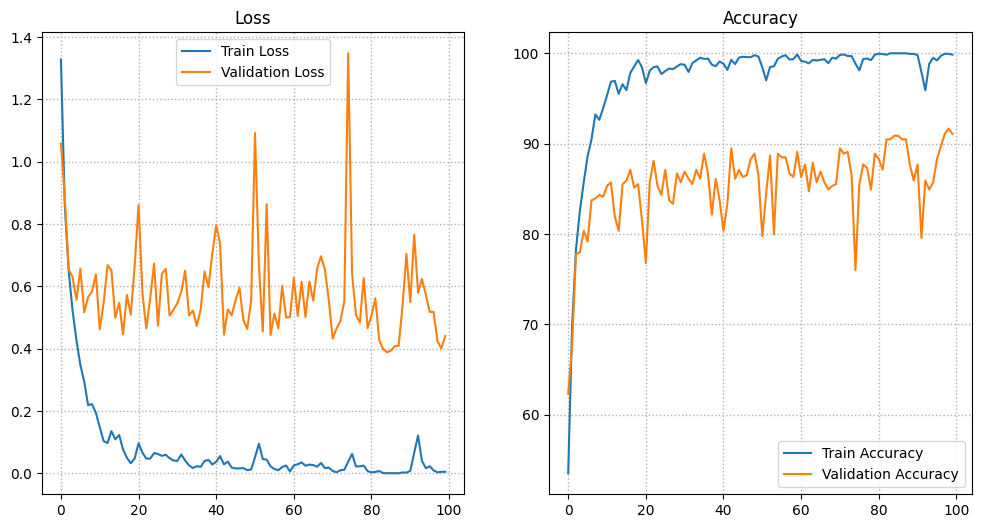

In [31]:
# Plot the training and validation loss and accuracy in another graph

import matplotlib.pyplot as plt

def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    ax1.plot(history['train_loss'], label='Train Loss')
    ax1.plot(history['val_loss'], label='Validation Loss')
    ax1.set_title('Loss')
    ax1.legend()
    ax1.grid(which='both', linestyle=':', linewidth=1)

    ax2.plot(history['train_accuracy'], label='Train Accuracy')
    ax2.plot(history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title('Accuracy')
    ax2.legend()
    ax2.grid(which='both', linestyle=':', linewidth=1)

    plt.show()

plot_training_history(history)

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.82
Recall: 0.82
F1-Score: 0.82
Accuracy: 0.91


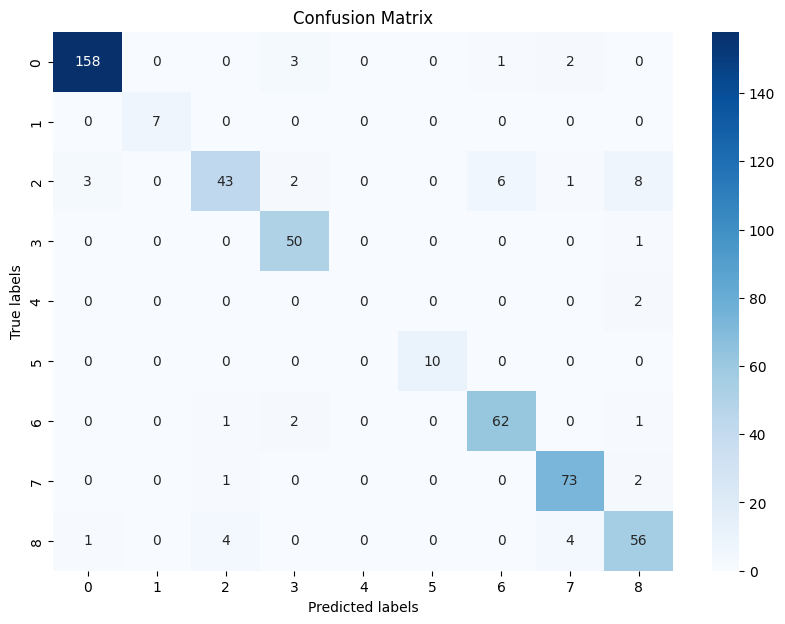

In [36]:
import torch
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set the model to evaluation mode
model.eval()

# Assume 'device' is the device your model is on, typically 'cuda' if using GPU
device = next(model.parameters()).device

def get_all_preds_labels(model, dataloader):
    all_preds = []
    all_labels = []
    
    # Disable gradient computation
    with torch.no_grad():
        for images, labels in dataloader:
            # Move images and labels to the same device as model
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)  # Forward pass
            _, predicted = torch.max(outputs, 1)  # Get the predicted classes
            all_preds.extend(predicted.cpu().numpy())  # Store predictions
            all_labels.extend(labels.cpu().numpy())  # Store true labels
    
    return np.array(all_preds), np.array(all_labels)

# Assuming 'test_dataloader' is your DataLoader for the test set
y_preds, y_true = get_all_preds_labels(model, val_dataloader)

# Calculate precision, recall, and F1-score
precision = precision_score(y_true, y_preds, average='macro')
recall = recall_score(y_true, y_preds, average='macro')
f1 = f1_score(y_true, y_preds, average='macro')
accuracy = accuracy_score(y_true, y_preds)  # Calculate accuracy

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_preds)

# Print the metrics
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))
print("Accuracy: {:.2f}".format(accuracy))  # Display accuracy

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))  # Set the figure size as needed
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


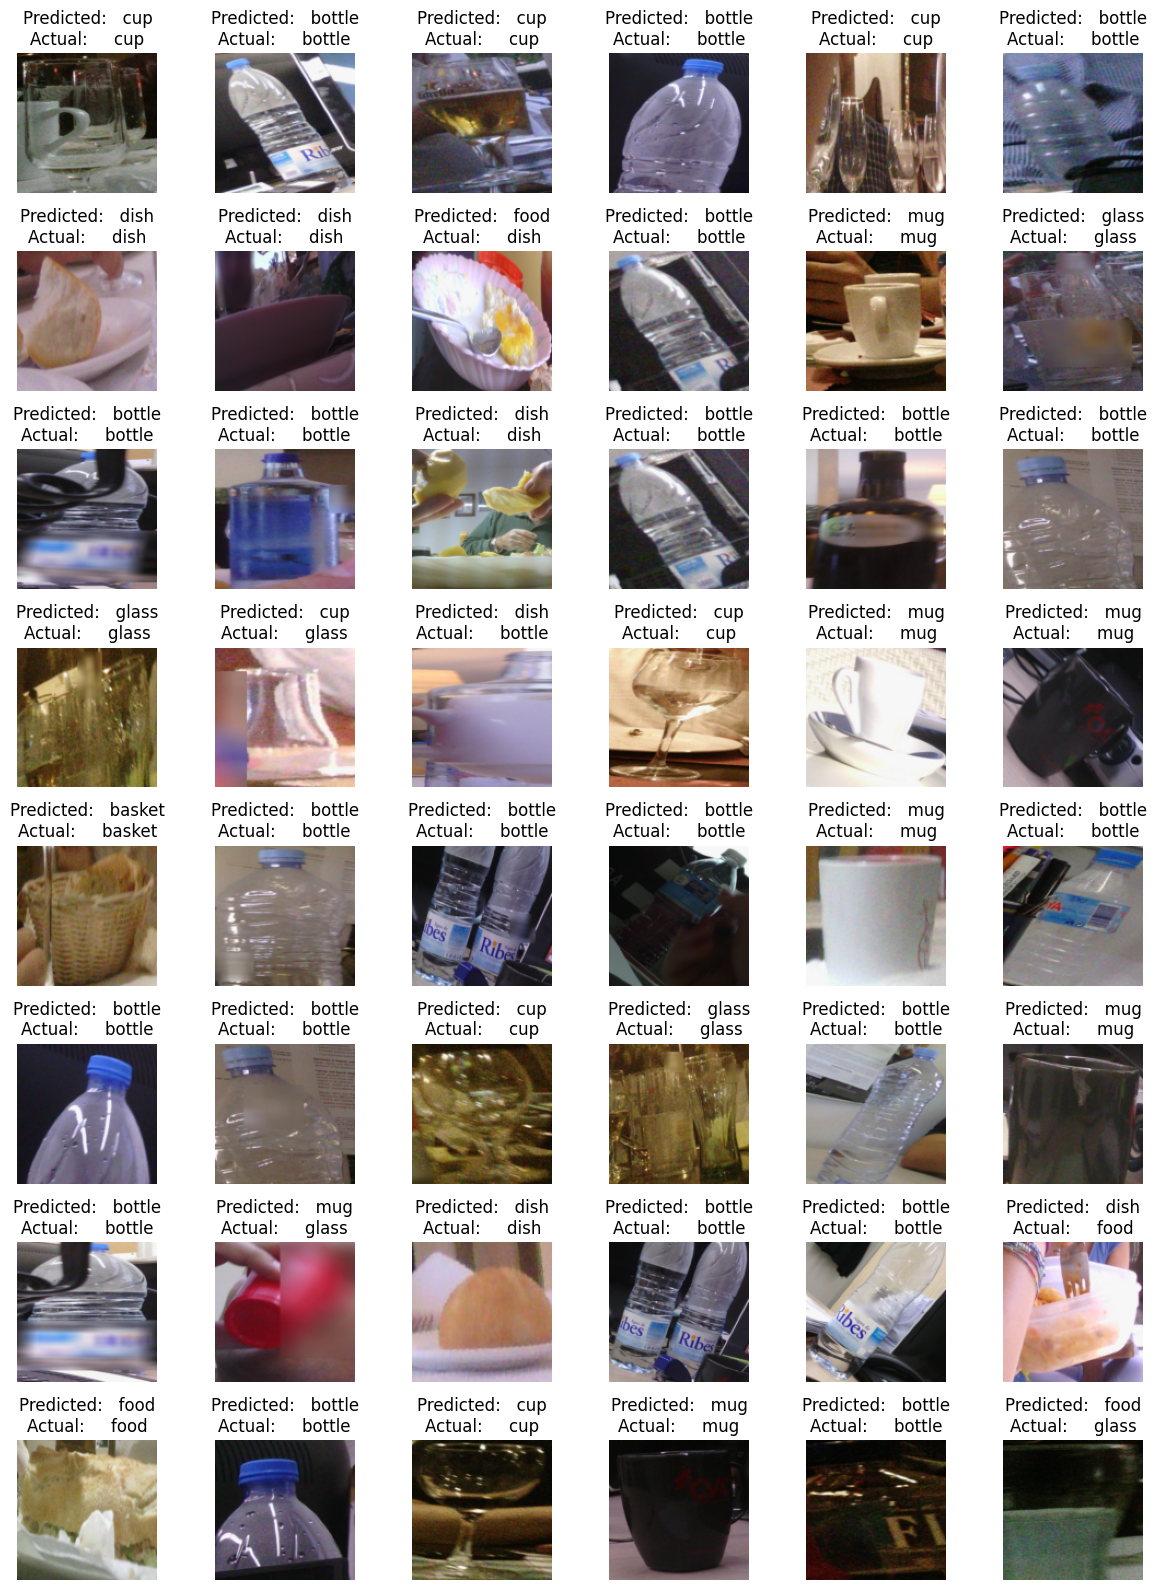

In [33]:
with open('category.txt', 'r') as f:
    next(f) 
    categories = f.readlines()
categories = [x.strip().split('\t')[1] for x in categories]


with open('category.txt', 'r') as f:
    next(f)  # Skip the header line
    categories = f.readlines()
categories = [x.strip().split('\t')[1] for x in categories]


def predict_image(img, modelf):
    # Convert to a batch of 1
    xb = img.unsqueeze(0)
    # Get predictions from model
    yb = modelf(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return preds[0].item()

# Load the best model 
best_model = DenseNet121(num_classes=9)  # Adjust num_classes to your dataset

best_model.load_state_dict(torch.load('models/best_model.pth'))

# Get a batch of validation data
test_dataloader = DataLoader(val_dataset, batch_size=48, shuffle=True)

# Get a batch of validation data
inputs, labels = next(iter(test_dataloader))

# Make predictions
preds = best_model(inputs)

# Convert the images to numpy arrays
images = inputs.numpy()

# Calculate the number of rows and columns
n_images = len(images)
n_cols = 6
n_rows = n_images // n_cols + (n_images % n_cols > 0)

# Create a figure with the calculated number of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 2 * n_rows))

# Flatten the axes array in case it's multidimensional
axes = axes.flatten()

# Plot the images along with the predicted labels
for i in range(n_images):
    axes[i].imshow(np.transpose(images[i], (1, 2, 0)))
    axes[i].set_title(f'Predicted:   {categories[preds[i].argmax()]}\nActual:     {categories[labels[i]]}')
    axes[i].axis('off')

# Hide the remaining axes
for i in range(n_images, n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [37]:
import torchvision.models as models
from torch import nn

# Load a pre-trained DenseNet121 model
pretrained_model = models.densenet121(pretrained=True)

num_classes = 9
num_ftrs = pretrained_model.classifier.in_features
pretrained_model.classifier = nn.Linear(num_ftrs, num_classes)


c:\Users\jhara\.pyenv\pyenv-win\versions\3.10.9\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\jhara\.pyenv\pyenv-win\versions\3.10.9\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [34]:
if torch.cuda.is_available():
        pretrained_model = pretrained_model.cuda()
loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(pretrained_model.parameters(), lr=0.0001)

# Train the model
preTrained_history = fit(pretrained_model, train_dataloader, val_dataloader, loss_function, optimizer, epochs=20)

Training epoch 1: 100%|██████████| 93/93 [00:32<00:00,  2.83it/s]


Epoch [1/20], Train Loss: 0.7243732329337828, Val Loss: 0.28223036229610443, Train Accuracy: 78.32379670144732%, Val Accuracy: 92.46031746031746%


Training epoch 2: 100%|██████████| 93/93 [00:32<00:00,  2.85it/s]


Epoch [2/20], Train Loss: 0.15476104216549985, Val Loss: 0.21780984848737717, Train Accuracy: 96.06193200942444%, Val Accuracy: 92.85714285714286%


Training epoch 3: 100%|██████████| 93/93 [00:32<00:00,  2.83it/s]


Epoch [3/20], Train Loss: 0.04860582412971604, Val Loss: 0.19153127446770668, Train Accuracy: 99.14170313025917%, Val Accuracy: 94.04761904761905%


Training epoch 4: 100%|██████████| 93/93 [00:32<00:00,  2.85it/s]


Epoch [4/20], Train Loss: 0.01977995454624135, Val Loss: 0.20185741037130356, Train Accuracy: 99.83170649612924%, Val Accuracy: 93.45238095238095%


Training epoch 5: 100%|██████████| 93/93 [00:32<00:00,  2.83it/s]


Epoch [5/20], Train Loss: 0.010633588938783575, Val Loss: 0.20353802107274532, Train Accuracy: 99.94951194883878%, Val Accuracy: 93.25396825396825%


Training epoch 6: 100%|██████████| 93/93 [00:32<00:00,  2.85it/s]


Epoch [6/20], Train Loss: 0.007088567040139629, Val Loss: 0.1977411457337439, Train Accuracy: 99.98317064961293%, Val Accuracy: 94.04761904761905%


Training epoch 7: 100%|██████████| 93/93 [00:36<00:00,  2.58it/s]


Epoch [7/20], Train Loss: 0.004779132423541879, Val Loss: 0.2224035446997732, Train Accuracy: 100.0%, Val Accuracy: 93.65079365079364%


Training epoch 8: 100%|██████████| 93/93 [00:36<00:00,  2.57it/s]


Epoch [8/20], Train Loss: 0.0035685854062678353, Val Loss: 0.19131976272910833, Train Accuracy: 100.0%, Val Accuracy: 94.24603174603175%


Training epoch 9: 100%|██████████| 93/93 [00:46<00:00,  2.01it/s]


Epoch [9/20], Train Loss: 0.0059334923943845175, Val Loss: 0.2044059180188924, Train Accuracy: 99.89902389767755%, Val Accuracy: 93.65079365079364%


Training epoch 10: 100%|██████████| 93/93 [00:39<00:00,  2.36it/s]


Epoch [10/20], Train Loss: 0.024547715521147175, Val Loss: 0.2874263059347868, Train Accuracy: 99.29316728374285%, Val Accuracy: 91.86507936507937%


Training epoch 11: 100%|██████████| 93/93 [00:40<00:00,  2.28it/s]


Epoch [11/20], Train Loss: 0.04045584421324473, Val Loss: 0.22867351723834872, Train Accuracy: 98.83877482329181%, Val Accuracy: 93.45238095238095%


Training epoch 12: 100%|██████████| 93/93 [00:36<00:00,  2.52it/s]


Epoch [12/20], Train Loss: 0.028078448568140308, Val Loss: 0.27083174604922533, Train Accuracy: 99.24267923258162%, Val Accuracy: 92.85714285714286%


Training epoch 13: 100%|██████████| 93/93 [00:44<00:00,  2.09it/s]


Epoch [13/20], Train Loss: 0.010530371566913941, Val Loss: 0.25698391254991293, Train Accuracy: 99.78121844496802%, Val Accuracy: 93.65079365079364%


Training epoch 14: 100%|██████████| 93/93 [00:34<00:00,  2.70it/s]


Epoch [14/20], Train Loss: 0.006358559095671261, Val Loss: 0.2333759036846459, Train Accuracy: 99.9326825984517%, Val Accuracy: 94.24603174603175%


Training epoch 15: 100%|██████████| 93/93 [00:44<00:00,  2.08it/s]


Epoch [15/20], Train Loss: 0.005532435492001554, Val Loss: 0.2509441231377423, Train Accuracy: 99.91585324806462%, Val Accuracy: 93.65079365079364%


Training epoch 16: 100%|██████████| 93/93 [00:42<00:00,  2.21it/s]


Epoch [16/20], Train Loss: 0.007866793186954593, Val Loss: 0.2633170501794666, Train Accuracy: 99.84853584651633%, Val Accuracy: 93.05555555555556%


Training epoch 17: 100%|██████████| 93/93 [00:32<00:00,  2.82it/s]


Epoch [17/20], Train Loss: 0.008631339532032769, Val Loss: 0.3005607482045889, Train Accuracy: 99.74755974419388%, Val Accuracy: 92.65873015873017%


Training epoch 18: 100%|██████████| 93/93 [00:37<00:00,  2.48it/s]


Epoch [18/20], Train Loss: 0.014941368302110063, Val Loss: 0.2562658400274813, Train Accuracy: 99.59609559071019%, Val Accuracy: 93.65079365079364%


Training epoch 19: 100%|██████████| 93/93 [00:32<00:00,  2.85it/s]


Epoch [19/20], Train Loss: 0.010645940609436522, Val Loss: 0.23477563657797873, Train Accuracy: 99.6634129922585%, Val Accuracy: 94.64285714285714%


Training epoch 20: 100%|██████████| 93/93 [00:32<00:00,  2.87it/s]


Epoch [20/20], Train Loss: 0.004012356321978313, Val Loss: 0.23852524324320257, Train Accuracy: 99.91585324806462%, Val Accuracy: 94.24603174603175%


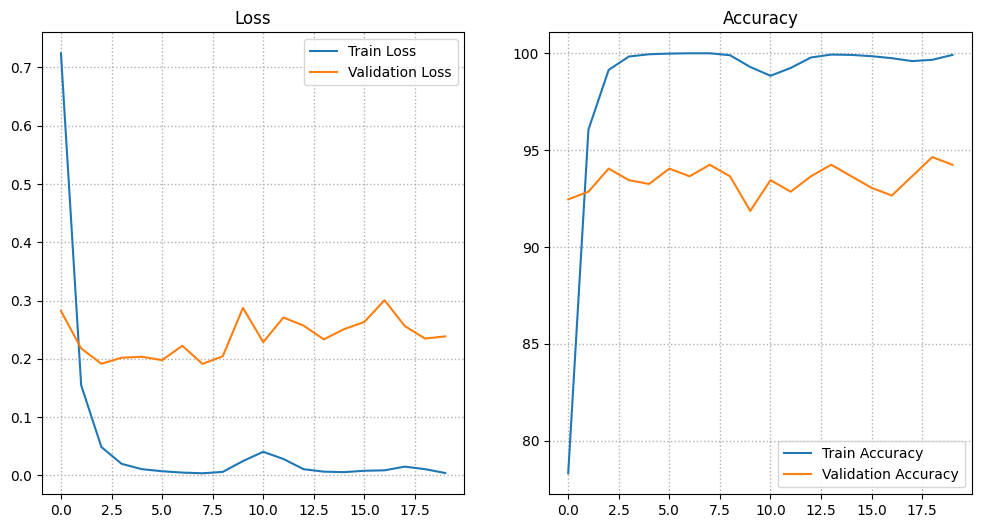

In [36]:
# Plot the training and validation loss and accuracy
import matplotlib.pyplot as plt

def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    ax1.plot(history['train_loss'], label='Train Loss')
    ax1.plot(history['val_loss'], label='Validation Loss')
    ax1.set_title('Loss')
    ax1.legend()
    ax1.grid(which='both', linestyle=':', linewidth=1)

    ax2.plot(history['train_accuracy'], label='Train Accuracy')
    ax2.plot(history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title('Accuracy')
    ax2.legend()
    ax2.grid(which='both', linestyle=':', linewidth=1)

    plt.show()

plot_training_history(preTrained_history)